## 線形回帰

参考 https://pythondatascience.plavox.info/scikit-learn/線形回帰

In [3]:
import pandas as pd
import numpy as np
 
wine = pd.read_csv("./datasets/winequality-red.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
X = wine.loc[:, ['density']]
Y = wine['alcohol']

In [6]:
from sklearn import linear_model

clf = linear_model.LinearRegression()
clf.fit(X, Y)

LinearRegression()

In [10]:
print(clf.coef_)       # 回帰係数
print(clf.intercept_)  # 切片 (誤差)
print(clf.score(X, Y)) # 決定係数

print(f'[alcohol] = {clf.coef_[0]} × [density] + {clf.intercept_}')

[-280.16382307]
289.67534338256456
0.2461943643971065
[alcohol] = -280.16382306826216 × [density] + 289.67534338256456


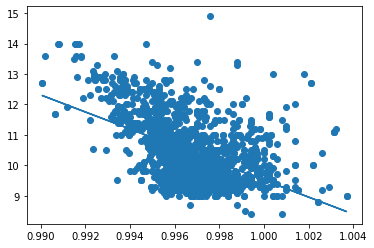

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.plot(X, clf.predict(X))

## 重回帰分析

In [25]:
X_m = wine.drop("quality", axis=1)
Y_m = wine['quality']

clf_m = linear_model.LinearRegression()
clf_m.fit(X_m, Y_m)

LinearRegression()

In [34]:
print(pd.DataFrame({ "Name":X_m.columns, "Coefficients":clf_m.coef_ }))
print('intercept_', clf_m.intercept_)

                    Name  Coefficients
0          fixed acidity      0.024991
1       volatile acidity     -1.083590
2            citric acid     -0.182564
3         residual sugar      0.016331
4              chlorides     -1.874225
5    free sulfur dioxide      0.004361
6   total sulfur dioxide     -0.003265
7                density    -17.881164
8                     pH     -0.413653
9              sulphates      0.916334
10               alcohol      0.276198
intercept_ 21.965208449451815


In [38]:
clf.coef_ * 0.9987 + clf.intercept_

array([9.87573328])